In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pickle
from utils_decentralized_timeVarying_gaussian import *
from collections import OrderedDict

### Evaluation of Decentralized Thompson Sampling for different time varying networks

#### Experiment Names:

Experiment number 1: 3 arms with Gaussian mean [0.1, 0.2, 0.5] and sigma 1.

Experiment number 2: 17 arms with Gaussian mean [0.5, 0.1, ...., 0.1] and sigma 1.

Experiment number 3: 4 arms with Gaussian mean [0.2646, 0.6135, 0.8950, 0.5764] with sigma 1. 

##### Network Topologies considered:

cycle (3 regular graph with self loops)

5 regular graph with self loops

grid

complete

##### Color Scheme

#e41a1c
#377eb8
#4daf4a
#984ea3
#ff7f00
#ffff33
#a65628

In [2]:
# Parameters for underlying MAB model
exp_num = 2
#theta = np.array([0.1, 0.2, 0.5]) # experiment 1
theta = np.array([0.5] + [0.1] * 16) # experiment 2
#theta = np.array([0.2646, 0.6135, 0.8950, 0.5764]) # experiment 3
num_arms = len(theta)
sigma = 1

# Parameters for Thompson Sampling
mean_vec = np.zeros(num_arms)
sigma_vec = np.ones(num_arms)

# Parameters for storing regret for each strategy
avg_cumm_regret = OrderedDict()

### Gossip protocol over complete graphs

In [3]:
# Parameters for run-time
max_iter = 800
runs = 2000

N = 100

avg_cumm_regret['N100_gossip'] = np.zeros((max_iter+1))
avg_cumm_regret['N100_gossip'] = run_MultiAgent_TS_gossip(max_iter, runs, N, 
                                                            mean_vec, sigma_vec, theta, sigma, 
                                                            exp_num, type_W ='complete', save = True, rerun=False)

Saved file was loaded


In [4]:
filename = './data/TS_N100_complete_T800_Run2000_GaussianExp2'
if os.path.isfile(filename):
    name = 'N100_complete'
    regret = read_regret(filename)
    avg_cumm_regret[name] = np.array(regret) 
    
filename = './data/TS_N100_cycle_T800_Run2000_GaussianExp2'
if os.path.isfile(filename):
    name = 'N100_cycle'
    regret = read_regret(filename)
    avg_cumm_regret[name] = np.array(regret) 
    
    
filename = './data/TS_N100_grid_T5000_Run1000_GaussianExp2'
if os.path.isfile(filename):
    name = 'N100_grid'
    regret = read_regret(filename)
    regret = np.array(regret)
    avg_cumm_regret[name] = regret[0:max_iter+1]

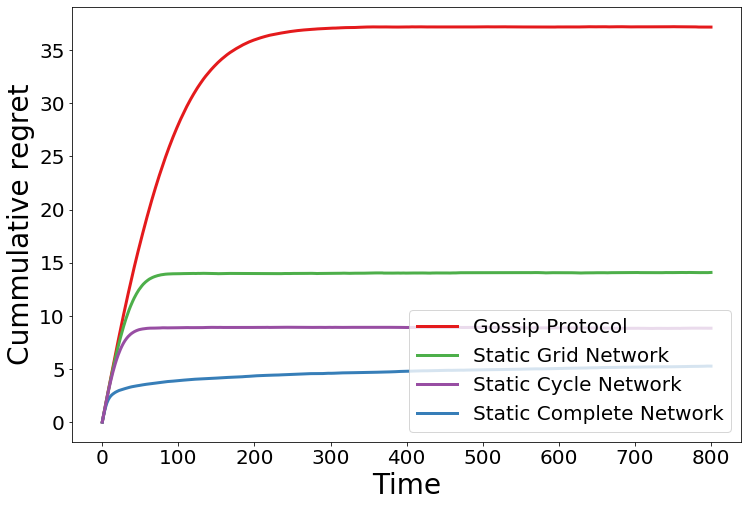

In [5]:
plt.figure(figsize=(12,8))

gossip_plot, = plt.plot(avg_cumm_regret['N100_gossip'], color='#e41a1c', label = r"Gossip Protocol", linewidth=3)
grid_plot, = plt.plot(avg_cumm_regret['N100_grid'], color='#4daf4a', label = r"Static Grid Network", linewidth=3)
complete_plot, = plt.plot(avg_cumm_regret['N100_complete'], color='#377eb8', label = r"Static Complete Network", linewidth=3)
cycle_plot, = plt.plot(avg_cumm_regret['N100_cycle'], color='#984ea3', label = r"Static Cycle Network", linewidth=3)


plt.xlabel("Time", fontsize = 28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel(r"Cummulative regret", fontsize = 28)
plt.legend(handles=[gossip_plot, grid_plot, cycle_plot, complete_plot], loc='lower right', fontsize = 20)
#plt.title("Cumulative Regret Over Time")
filename = 'results_N{}_T{}_Gossip_GaussianExp{}.pdf'.format(N, max_iter, exp_num)
plt.savefig(filename, bbox_inches='tight')
plt.show()

### Link failure over complete graphs

In [6]:
N = 64
max_iter = 800
runs = 2000


# Parameters for underlying MAB model
exp_num = 2
#theta = np.array([0.1, 0.2, 0.5]) # experiment 1
theta = np.array([0.5] + [0.1] * 16) # experiment 2
#theta = np.array([0.2646, 0.6135, 0.8950, 0.5764]) # experiment 3
num_arms = len(theta)
sigma = 1

# Parameters for Thompson Sampling
mean_vec = np.zeros(num_arms)
sigma_vec = np.ones(num_arms)

# Parameters for storing regret for each strategy
avg_cumm_regret = OrderedDict()

In [7]:
filename = './data/TS_N64_complete_T800_Run2000_GaussianExp2'
if os.path.isfile(filename):
    name = 'N64_complete'
    regret = read_regret(filename)
    avg_cumm_regret[name] = np.array(regret) 

In [8]:
p = 0.1
avg_cumm_regret['N64_linkfailure_0.1'] = np.zeros((max_iter+1))
avg_cumm_regret['N64_linkfailure_0.1'] = run_MultiAgent_TS_linkfailure(max_iter, runs, N, 
                                                                 mean_vec, sigma_vec, theta, sigma, 
                                                                 exp_num, p, type_W ='complete', save = True, rerun=False)

Saved file was loaded


In [9]:
p = 0.2
avg_cumm_regret['N64_linkfailure_0.2'] = np.zeros((max_iter+1))
avg_cumm_regret['N64_linkfailure_0.2'] = run_MultiAgent_TS_linkfailure(max_iter, runs, N, 
                                                                 mean_vec, sigma_vec, theta, sigma, 
                                                                 exp_num, p, type_W ='complete', save = True, rerun=False)

Saved file was loaded


In [10]:
p = 0.3
avg_cumm_regret['N64_linkfailure_0.3'] = np.zeros((max_iter+1))
avg_cumm_regret['N64_linkfailure_0.3'] = run_MultiAgent_TS_linkfailure(max_iter, runs, N, 
                                                                 mean_vec, sigma_vec, theta, sigma, 
                                                                 exp_num, p, type_W ='complete', save = True, rerun=False)

Saved file was loaded


In [11]:
p = 0.4
avg_cumm_regret['N64_linkfailure_0.4'] = np.zeros((max_iter+1))
avg_cumm_regret['N64_linkfailure_0.4'] = run_MultiAgent_TS_linkfailure(max_iter, runs, N, 
                                                                 mean_vec, sigma_vec, theta, sigma, 
                                                                 exp_num, p, type_W ='complete', save = True, rerun=False)

Saved file was loaded


In [12]:
p = 0.8
avg_cumm_regret['N64_linkfailure_0.8'] = np.zeros((max_iter+1))
avg_cumm_regret['N64_linkfailure_0.8'] = run_MultiAgent_TS_linkfailure(max_iter, runs, N, 
                                                                 mean_vec, sigma_vec, theta, sigma, 
                                                                 exp_num, p, type_W ='complete', save = True, rerun=False)

Saved file was loaded


In [13]:
p = 0.9
avg_cumm_regret['N64_linkfailure_0.9'] = np.zeros((max_iter+1))
avg_cumm_regret['N64_linkfailure_0.9'] = run_MultiAgent_TS_linkfailure(max_iter, runs, N, 
                                                                 mean_vec, sigma_vec, theta, sigma, 
                                                                 exp_num, p, type_W ='complete', save = True, rerun=False)

Saved file was loaded


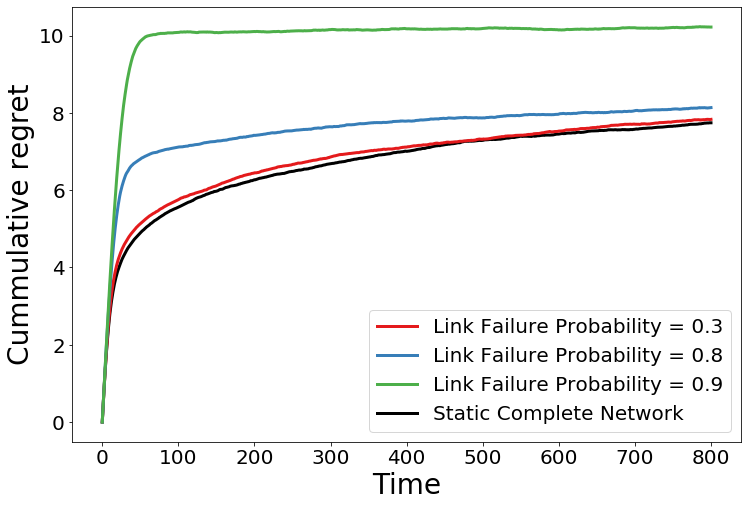

In [15]:
plt.figure(figsize=(12,8))

#lk_01_plot, = plt.plot(avg_cumm_regret['N64_linkfailure_0.1'], color='#e41a1c', label = r"Link Failure Probability = 0.1")
complete_plot, = plt.plot(avg_cumm_regret['N64_complete'], color='#000000', label = r"Static Complete Network", linewidth=3)
#lk_02_plot, = plt.plot(avg_cumm_regret['N64_linkfailure_0.2'], color='#377eb8', label = r"Link Failure Probability = 0.2")
lk_03_plot, = plt.plot(avg_cumm_regret['N64_linkfailure_0.3'], color='#e41a1c', label = r"Link Failure Probability = 0.3", linewidth=3)
#lk_04_plot, = plt.plot(avg_cumm_regret['N64_linkfailure_0.4'], color='#984ea3', label = r"Link Failure Probability = 0.4")
lk_08_plot, = plt.plot(avg_cumm_regret['N64_linkfailure_0.8'], color='#377eb8', label = r"Link Failure Probability = 0.8", linewidth=3)
lk_09_plot, = plt.plot(avg_cumm_regret['N64_linkfailure_0.9'], color='#4daf4a', label = r"Link Failure Probability = 0.9", linewidth=3)

plt.xlabel("Time", fontsize = 28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel(r"Cummulative regret", fontsize = 28)
plt.legend(handles=[lk_03_plot, lk_08_plot, lk_09_plot, complete_plot], loc='lower right', fontsize = 20)
filename = 'results_N{}_T{}_linkfailure_GaussianExp{}.pdf'.format(N, max_iter, exp_num)
plt.savefig(filename, bbox_inches='tight')
#plt.ylim([4,8])
plt.show()